In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns

from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error


In [ ]:
df_california = pd.read_csv('../data/housing.csv')

df_Ames = pd.read_csv('../data/AmesHousing.csv')

# Exploring the Datasets

In [ ]:
print(df_california.info())
print('\n')
print(df_Ames.info())
print('\n')
print(df_california.head())
df_california.drop_duplicates(inplace=True)
df_Ames.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  

# Feature Selection

In [ ]:
df_cal = df_california[['housing_median_age','total_rooms','total_bedrooms','median_house_value','ocean_proximity']]
df_Am = df_Ames[['Year Built','TotRms AbvGrd','Bedroom AbvGr','SalePrice']]
df_Am['ocean_proximity']=  'INLAND'


df_cal_copy2 = df_california.copy()
df_cal_copy2.dropna(inplace=True)



/tmp/ipython-input-689692817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Am['ocean_proximity']=  'INLAND'


# Data preprocessing

In [ ]:
print(df_cal.isnull().sum().sum())
print(df_Am.isnull().sum().sum())

207
0


In [ ]:
df_cal.dropna(inplace=True)
print(df_cal['total_rooms'])

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20433, dtype: float64


/tmp/ipython-input-805960758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal.dropna(inplace=True)


In [ ]:
for i in range(len(df_cal)):
  df_cal.iloc[i,1] = df_cal.iloc[i,1]/df_cal_copy2.iloc[i,6]
  df_cal.iloc[i,2] = df_cal.iloc[i,2]/df_cal_copy2.iloc[i,6]


In [ ]:
print(df_cal['total_rooms'])
print(df_cal['total_bedrooms'])

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: total_rooms, Length: 20433, dtype: float64
0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: total_bedrooms, Length: 20433, dtype: float64


# Renaming Of Columns

In [ ]:
df_cal.rename(columns={'housing_median_age':'housing_age','total_rooms':'total_rooms','total_bedrooms':'total_bedrooms','median_house_value':'house_price','ocean_proximity':'ocean_proximity'},inplace= True)

df_Am.rename(columns={'Year Built':'housing_age','TotRms AbvGrd':'total_rooms','Bedroom AbvGr':'total_bedrooms','SalePrice':'house_price','ocean_proximity':'ocean_proximity'},inplace=True)

/tmp/ipython-input-3092032029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal.rename(columns={'housing_median_age':'housing_age','total_rooms':'total_rooms','total_bedrooms':'total_bedrooms','median_house_value':'house_price','ocean_proximity':'ocean_proximity'},inplace= True)
/tmp/ipython-input-3092032029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Am.rename(columns={'Year Built':'housing_age','TotRms AbvGrd':'total_rooms','Bedroom AbvGr':'total_bedrooms','SalePrice':'house_price','ocean_proximity':'ocean_proximity'},inplace=True)


In [ ]:
print(df_cal.info())
print(df_cal.head())
print(df_Am.info())
print(df_Am.head())


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   housing_age      20433 non-null  float64
 1   total_rooms      20433 non-null  float64
 2   total_bedrooms   20433 non-null  float64
 3   house_price      20433 non-null  float64
 4   ocean_proximity  20433 non-null  object 
dtypes: float64(4), object(1)
memory usage: 957.8+ KB
None
   housing_age  total_rooms  total_bedrooms  house_price ocean_proximity
0         41.0     6.984127        1.023810     452600.0        NEAR BAY
1         21.0     6.238137        0.971880     358500.0        NEAR BAY
2         52.0     8.288136        1.073446     352100.0        NEAR BAY
3         52.0     5.817352        1.073059     341300.0        NEAR BAY
4         52.0     6.281853        1.081081     342200.0        NEAR BAY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data

# CONCATENATION OF THE TWO DATASETS

In [ ]:
df_concat =  pd.concat([df_cal, df_Am], axis = 0, ignore_index=True)
print(df_concat.head())

   housing_age  total_rooms  total_bedrooms  house_price ocean_proximity
0         41.0     6.984127        1.023810     452600.0        NEAR BAY
1         21.0     6.238137        0.971880     358500.0        NEAR BAY
2         52.0     8.288136        1.073446     352100.0        NEAR BAY
3         52.0     5.817352        1.073059     341300.0        NEAR BAY
4         52.0     6.281853        1.081081     342200.0        NEAR BAY


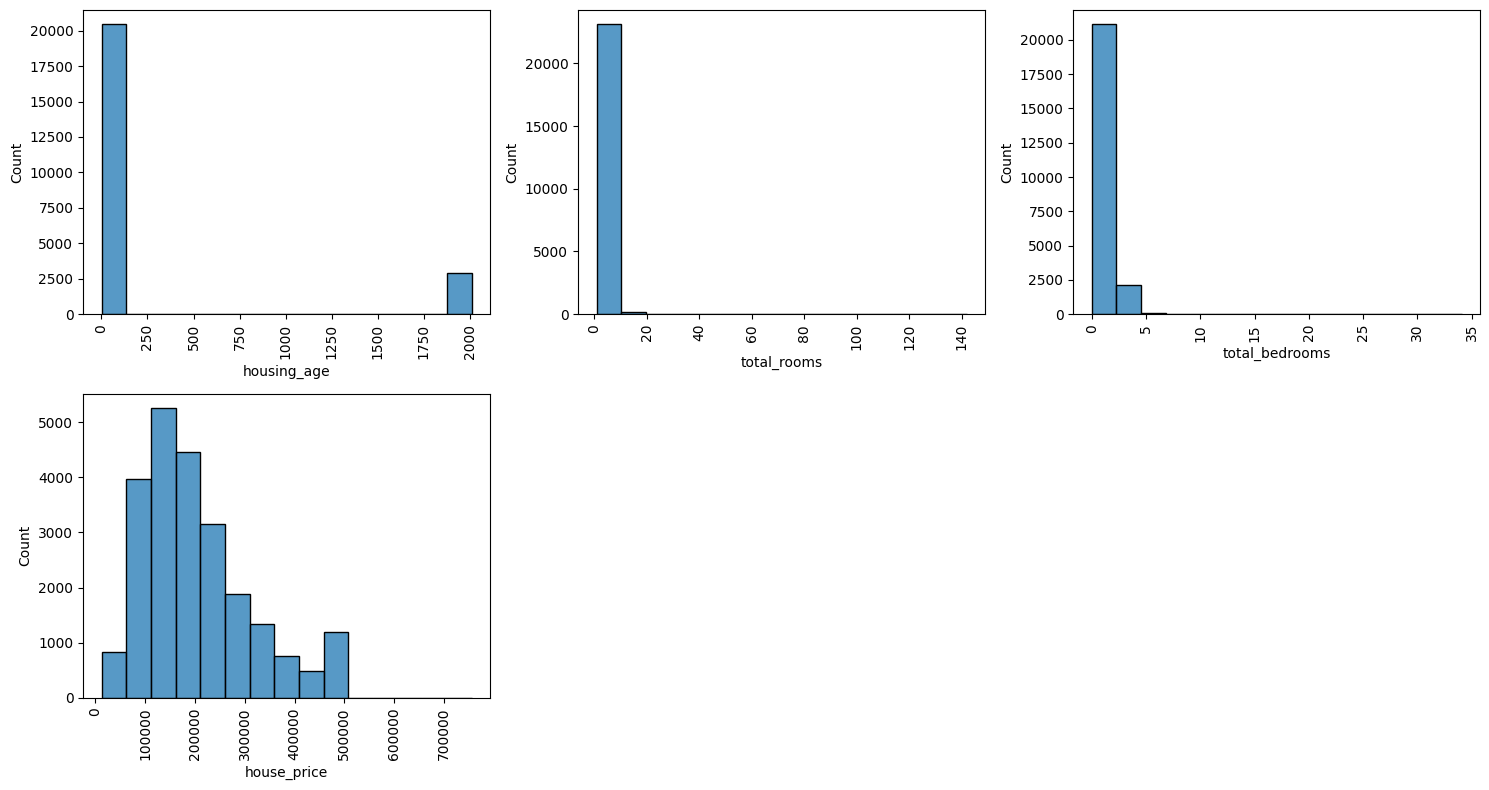

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

df_num = df_concat.select_dtypes(include=['float64', 'int64'])
num_var = df_num.columns.tolist()
num_plots = len(num_var)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(15, rows * 4))
for i, x in enumerate(num_var):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df_num[x], bins=15)
    plt.xticks(rotation=90)   # <-- rotate x-axis labels
plt.tight_layout()
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df_concat, columns=["ocean_proximity"], drop_first=True)
print(df_encoded)

       housing_age  total_rooms  total_bedrooms  house_price  \
0             41.0     6.984127        1.023810     452600.0   
1             21.0     6.238137        0.971880     358500.0   
2             52.0     8.288136        1.073446     352100.0   
3             52.0     5.817352        1.073059     341300.0   
4             52.0     6.281853        1.081081     342200.0   
...            ...          ...             ...          ...   
23358       1984.0     6.000000        3.000000     142500.0   
23359       1983.0     5.000000        2.000000     131000.0   
23360       1992.0     6.000000        3.000000     132000.0   
23361       1974.0     6.000000        2.000000     170000.0   
23362       1993.0     9.000000        3.000000     188000.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3  

In [ ]:
X= df_encoded.drop('house_price',axis=1)
y= df_encoded['house_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)

(18690, 7)


# Building The models

In [ ]:
model_data = []

model_dictionary = {
    'linear Model':LinearRegression(),
    'Lasso':Lasso(alpha=0.01),

    'Ridge':Ridge(alpha=0.01),

    'Decision Tree':DecisionTreeRegressor(max_features=4,
                                          max_depth=2,random_state=42,
                                          min_samples_split=3,min_samples_leaf=6),

    'RandomForest':RandomForestRegressor(n_estimators=1000,random_state=42,
                                         max_depth=3,min_samples_split=3,max_features='sqrt'),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100,random_state=42),
    'XGBoost':XGBRegressor(n_estimators=10000,random_state=42,max_features='log2',
                           ),
    'LightGBM':LGBMRegressor(n_estimator=10000,random_state=42)

}





for name,model in model_dictionary.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)

  model_data.append({
      'name':name,
      'mae':mae,
      'r2':r2,
      'mse':mse
  })




/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:05:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 18690, number of used features: 6
[LightGBM] [Info] Start training from score 203470.567309
[LightGBM] [Warning] Unknown parameter: n_estimator


# Evaluation Score of the models

In [ ]:
df_evaluate = pd.DataFrame(model_data)

print(df_evaluate)

            name           mae        r2           mse
0   linear Model  66915.014164  0.358562  8.099511e+09
1          Lasso  66914.993263  0.358562  8.099504e+09
2          Ridge  66914.725374  0.358569  8.099417e+09
3  Decision Tree  67666.555725  0.363193  8.041030e+09
4   RandomForest  67574.271061  0.361008  8.068627e+09
5  GradientBoost  57375.841825  0.503315  6.271691e+09
6        XGBoost  69548.536633  0.281061  9.078126e+09
7       LightGBM  56620.718816  0.508069  6.211670e+09



Decision Tree Feature Importances:
                      Feature  Importance
3      ocean_proximity_INLAND    0.591688
1                 total_rooms    0.348451
2              total_bedrooms    0.059860
0                 housing_age    0.000000
4      ocean_proximity_ISLAND    0.000000
5    ocean_proximity_NEAR BAY    0.000000
6  ocean_proximity_NEAR OCEAN    0.000000


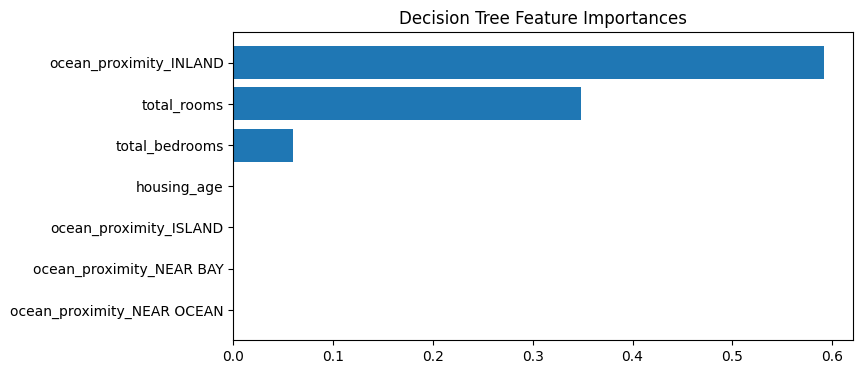


RandomForest Feature Importances:
                      Feature  Importance
3      ocean_proximity_INLAND    0.434465
1                 total_rooms    0.329984
0                 housing_age    0.067200
2              total_bedrooms    0.062996
5    ocean_proximity_NEAR BAY    0.061836
6  ocean_proximity_NEAR OCEAN    0.042963
4      ocean_proximity_ISLAND    0.000556


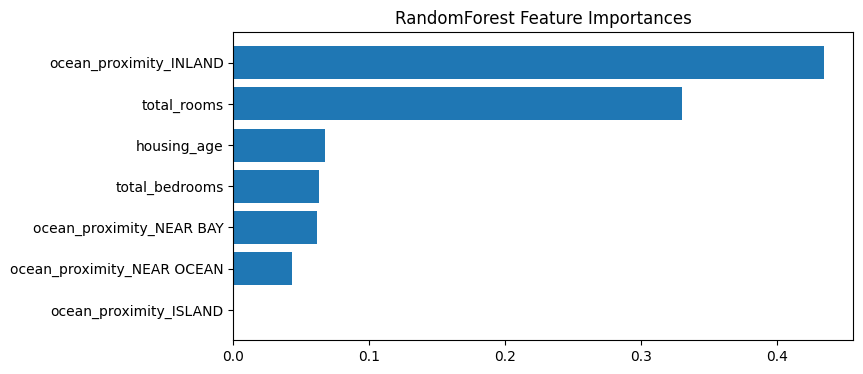


GradientBoost Feature Importances:
                      Feature  Importance
1                 total_rooms    0.411687
3      ocean_proximity_INLAND    0.391819
0                 housing_age    0.140391
2              total_bedrooms    0.049605
6  ocean_proximity_NEAR OCEAN    0.003186
5    ocean_proximity_NEAR BAY    0.002420
4      ocean_proximity_ISLAND    0.000893


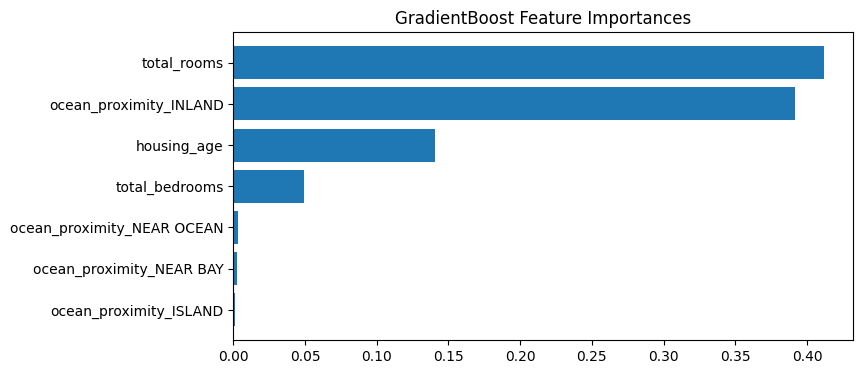


XGBoost Feature Importances:
                      Feature  Importance
3      ocean_proximity_INLAND    0.627135
5    ocean_proximity_NEAR BAY    0.079611
1                 total_rooms    0.076822
6  ocean_proximity_NEAR OCEAN    0.071145
4      ocean_proximity_ISLAND    0.055876
0                 housing_age    0.049506
2              total_bedrooms    0.039905


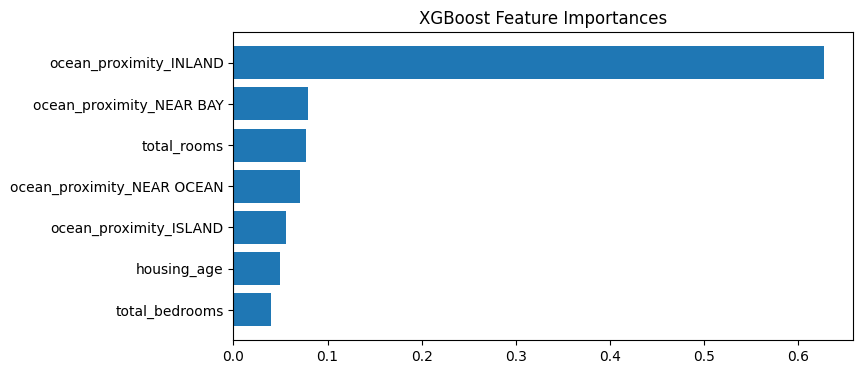


LightGBM Feature Importances:
                      Feature  Importance
2              total_bedrooms         991
1                 total_rooms         897
0                 housing_age         860
3      ocean_proximity_INLAND          91
6  ocean_proximity_NEAR OCEAN          87
5    ocean_proximity_NEAR BAY          74
4      ocean_proximity_ISLAND           0


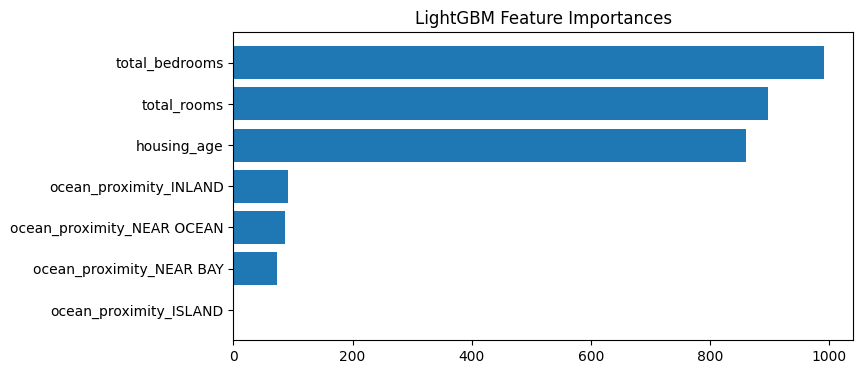

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances for tree-based models only
for name, model in model_dictionary.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_names = X_train.columns  # assuming X_train is a DataFrame

        # Put in DataFrame for easy handling
        feat_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values("Importance", ascending=False)

        print(f"\n{name} Feature Importances:")
        print(feat_imp)

        # Plot
        plt.figure(figsize=(8,4))
        plt.barh(feat_imp["Feature"], feat_imp["Importance"])
        plt.title(f"{name} Feature Importances")
        plt.gca().invert_yaxis()
        plt.show()



linear Model Coefficients:
                      Feature    Coefficient
4      ocean_proximity_ISLAND  224601.321679
1                 total_rooms   25388.469422
5    ocean_proximity_NEAR BAY   17709.008961
6  ocean_proximity_NEAR OCEAN    8035.271896
0                 housing_age      92.040818
2              total_bedrooms  -79789.395054
3      ocean_proximity_INLAND -124752.443031


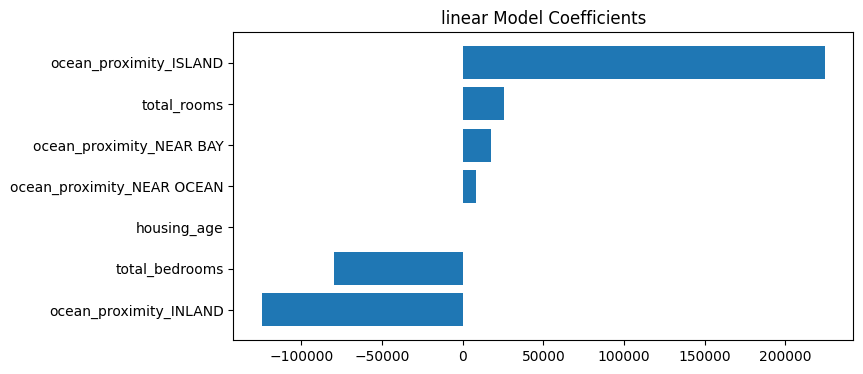


Lasso Coefficients:
                      Feature    Coefficient
4      ocean_proximity_ISLAND  224538.914073
1                 total_rooms   25388.443430
5    ocean_proximity_NEAR BAY   17708.857799
6  ocean_proximity_NEAR OCEAN    8035.127882
0                 housing_age      92.040684
2              total_bedrooms  -79789.252210
3      ocean_proximity_INLAND -124752.458242


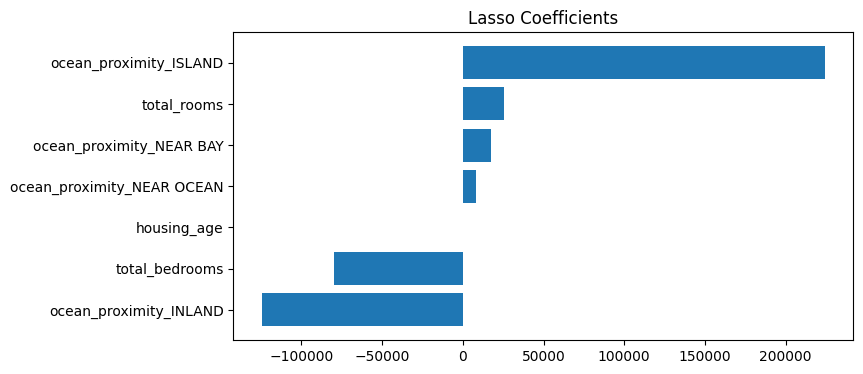


Ridge Coefficients:
                      Feature    Coefficient
4      ocean_proximity_ISLAND  223854.631968
1                 total_rooms   25388.326866
5    ocean_proximity_NEAR BAY   17708.754116
6  ocean_proximity_NEAR OCEAN    8035.045284
0                 housing_age      92.040013
2              total_bedrooms  -79788.550112
3      ocean_proximity_INLAND -124752.382873


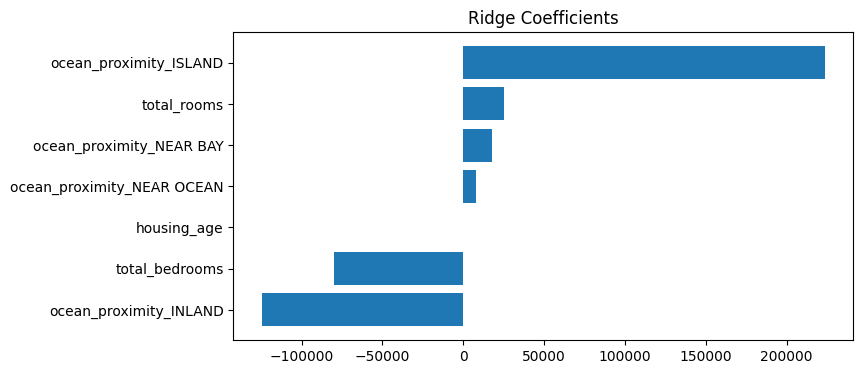

In [ ]:
for name, model in model_dictionary.items():
    if hasattr(model, "coef_"):
        coefs = model.coef_
        feature_names = X_train.columns

        coef_df = pd.DataFrame({
            "Feature": feature_names,
            "Coefficient": coefs
        }).sort_values("Coefficient", ascending=False)

        print(f"\n{name} Coefficients:")
        print(coef_df)

        plt.figure(figsize=(8,4))
        plt.barh(coef_df["Feature"], coef_df["Coefficient"])
        plt.title(f"{name} Coefficients")
        plt.gca().invert_yaxis()
        plt.show()
